# Homework 5 session 8,9

## Task 1. Visualization of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head(20)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,5.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,6.0,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,7.0,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,9.0,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

In [4]:
#split data into training, validation and test samples
X1=X[:1000,:]; y1=y[:1000] #training
X2=X[1000:-300,:]; y2=y[1000:-300] #validation
X3=X[-300:,:]; y3=y[-300:] #testing

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


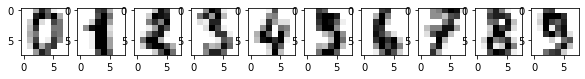

In [5]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

Now apply PCA to see if we can describe the data with a smaller number of most significant features

### Q1. Use PCA to transform the first 1000 digit images (X1). How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?
Make sure to standardize the data beofe applying PCA

# Scaling all 3 datasets

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X1)
s1=pd.DataFrame(data=scaler.transform(X1))
s1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.310025,0.047254,0.379835,-0.626913,-0.871974,-0.430134,-0.140883,-0.031639,-0.611056,...,-0.771574,-0.200248,-0.031639,-0.291074,0.184702,0.253910,-0.416104,-1.202572,-0.529799,-0.204578
1,0.0,-0.310025,-1.041558,0.151294,0.299103,-0.160159,-0.430134,-0.140883,-0.031639,-0.611056,...,-0.771574,-0.200248,-0.031639,-0.291074,-1.041198,-0.197084,0.839113,0.475591,-0.529799,-0.204578
2,0.0,-0.310025,-1.041558,-1.677032,0.762112,1.085519,-0.430134,-0.140883,-0.031639,-0.611056,...,0.278472,-0.200248,-0.031639,-0.291074,-1.041198,-2.001060,-0.206902,1.482489,1.557849,-0.204578
3,0.0,-0.310025,0.482780,0.836916,0.299103,-0.871974,-0.430134,-0.140883,-0.031639,2.295274,...,1.118510,-0.200248,-0.031639,-0.291074,0.389019,0.253910,0.211504,0.307775,-0.529799,-0.204578
4,0.0,-0.310025,-1.041558,-2.362655,-0.163905,-1.049928,-0.430134,-0.140883,-0.031639,-0.611056,...,-0.771574,-0.200248,-0.031639,-0.291074,-1.041198,-2.226557,0.839113,-0.531306,-0.529799,-0.204578


In [7]:
s1.shape

(1000, 64)

In [8]:
scaler.fit(X2)
s2=pd.DataFrame(data=scaler.transform(X2))
s2.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.394797,-1.024805,0.337657,-2.504060,-1.021154,-0.398166,-0.120754,-0.104807,-0.712691,...,0.696584,2.795789,0.0,-0.343061,-0.845832,-0.400085,-0.025542,1.362003,3.206807,7.331797
1,0.0,-0.394797,-1.225961,-2.923336,0.646005,-0.675907,-0.398166,-0.120754,-0.104807,-0.712691,...,-0.799698,-0.264799,0.0,-0.343061,-1.219005,-2.579840,0.780448,-0.321029,-0.521341,-0.220856
2,0.0,-0.394797,-0.019023,0.839349,-0.080933,-0.848530,-0.398166,-0.120754,-0.104807,0.083877,...,-0.425627,-0.264799,0.0,-0.343061,0.087099,0.810890,0.175955,-0.657635,-0.521341,-0.220856
3,0.0,2.719710,0.785603,-0.414880,-0.080933,1.050330,1.498529,-0.120754,-0.104807,1.411492,...,-0.799698,-0.264799,0.0,1.828933,1.579788,0.810890,0.175955,-0.825939,-0.521341,-0.220856
4,0.0,-0.394797,1.590228,0.839349,0.646005,-0.503283,-0.398166,-0.120754,-0.104807,-0.712691,...,1.818795,-0.264799,0.0,0.742936,0.833443,0.810890,0.780448,1.193700,-0.055322,-0.220856


In [9]:
scaler.fit(X3)
s3=pd.DataFrame(data=scaler.transform(X3))
s3.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.319308,-1.090082,0.466454,-1.720052,-0.929277,-0.365625,-0.072364,0.0,-0.562792,...,0.441303,-0.146398,0.0,-0.268322,-0.875749,0.251612,1.018868,0.713904,-0.418310,-0.129593
1,0.0,0.658166,0.819861,0.717236,0.341262,-0.209837,-0.365625,-0.072364,0.0,0.926075,...,0.878959,-0.146398,0.0,-0.268322,0.492609,0.698261,1.018868,0.713904,-0.026144,-0.129593
2,0.0,4.568060,2.305372,0.215672,-2.407157,-0.929277,-0.365625,-0.072364,0.0,2.117169,...,1.754271,-0.146398,0.0,4.154571,2.056445,0.474936,-0.130952,0.526692,1.934682,-0.129593
3,0.0,-0.319308,-1.090082,-2.292145,0.112227,1.229044,0.412301,-0.072364,0.0,-0.562792,...,-0.434009,-0.146398,0.0,-0.268322,-1.071228,-1.981631,1.018868,1.462755,0.366021,-0.129593
4,0.0,-0.319308,-0.665651,0.215672,1.028367,1.588764,0.023338,-0.072364,0.0,-0.562792,...,-0.652837,-0.146398,0.0,-0.268322,-0.093830,0.698261,-1.280771,-0.971010,-0.418310,-0.129593


# Perform PC decomposition over s1 (scaled X1)

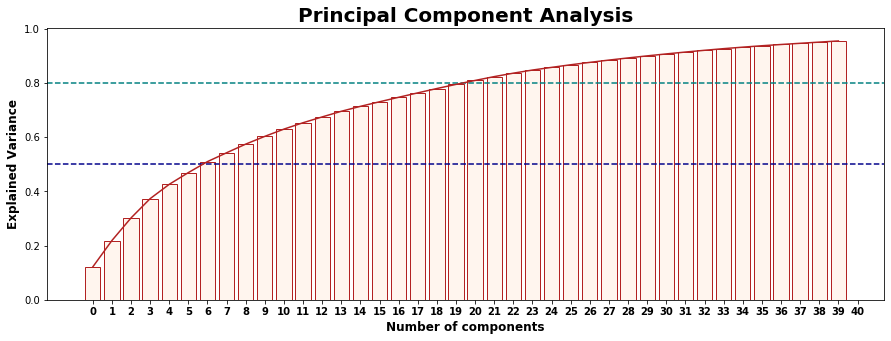

In [10]:
pca = PCA(n_components=s1.shape[1])
s1P=pca.fit_transform(s1)
eigenvalues_train = pca.explained_variance_ratio_

n=40
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, n+1, 1), weight='bold')

plt.axhline(y=0.5, color='darkblue', linestyle='--')
plt.axhline(y=0.8, color='teal', linestyle='--')
plt.bar(np.arange(n), eigenvalues_train[:n].cumsum(), edgecolor='firebrick', color='seashell')
plt.plot(np.cumsum(pca.explained_variance_ratio_[:n]), color="firebrick")

plt.title('Principal Component Analysis', weight='bold', fontsize=20)
plt.xlabel("Number of components", weight='bold', fontsize=12)
plt.ylabel("Explained Variance", weight='bold', fontsize=12)

plt.show()

# 6PCAs are needed for 50%, and 19PCAs for 80%


### Q2. Visualize digits 3, 6, 7 (y=3,6,7) using the first two principal components of X1  

In [11]:
temp=pd.DataFrame(data=s1P)
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.462621,-1.481760,-4.425389,1.440417,0.007824,0.649491,-0.607300,1.320935,0.312769,-0.935029,...,-0.003409,0.246271,-0.434251,0.031675,-0.102806,-0.062538,-0.080752,0.000000e+00,0.000000e+00,6.124685e-15
1,0.657289,0.588974,4.141148,-0.925951,-1.091260,-0.722809,1.234368,-0.019765,0.840140,-0.966422,...,0.203673,0.391653,0.513634,0.067937,0.145519,-0.097069,0.053741,3.246228e-16,4.116789e-16,4.165349e-17
2,1.153095,-0.769277,3.256549,-1.337331,-1.598892,0.865749,-1.736966,-1.711524,2.348701,-1.181694,...,-0.120754,-0.182823,0.037166,-0.270272,-0.554368,0.168907,-0.143377,2.693079e-16,1.657786e-16,2.571969e-17
3,-3.105652,0.377204,-0.640717,-2.668244,-0.142133,0.766950,0.537913,0.069358,-1.860686,0.111152,...,-0.174548,0.039301,0.175544,-0.341600,-0.158726,-0.050395,-0.157472,-3.154779e-16,-9.639631e-17,2.346208e-17
4,3.834991,-2.530604,1.480301,-1.157611,-0.981648,1.256589,1.220412,0.544011,-2.289642,0.676972,...,-0.416314,-0.309981,-0.132869,0.206081,-0.036316,0.023418,0.168387,8.354126e-17,2.201322e-16,-1.128860e-17


In [12]:
yy=y1.astype(int, copy=True)
temp['y'] = yy
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,1.462621,-1.481760,-4.425389,1.440417,0.007824,0.649491,-0.607300,1.320935,0.312769,-0.935029,...,0.246271,-0.434251,0.031675,-0.102806,-0.062538,-0.080752,0.000000e+00,0.000000e+00,6.124685e-15,0
1,0.657289,0.588974,4.141148,-0.925951,-1.091260,-0.722809,1.234368,-0.019765,0.840140,-0.966422,...,0.391653,0.513634,0.067937,0.145519,-0.097069,0.053741,3.246228e-16,4.116789e-16,4.165349e-17,1
2,1.153095,-0.769277,3.256549,-1.337331,-1.598892,0.865749,-1.736966,-1.711524,2.348701,-1.181694,...,-0.182823,0.037166,-0.270272,-0.554368,0.168907,-0.143377,2.693079e-16,1.657786e-16,2.571969e-17,2
3,-3.105652,0.377204,-0.640717,-2.668244,-0.142133,0.766950,0.537913,0.069358,-1.860686,0.111152,...,0.039301,0.175544,-0.341600,-0.158726,-0.050395,-0.157472,-3.154779e-16,-9.639631e-17,2.346208e-17,3
4,3.834991,-2.530604,1.480301,-1.157611,-0.981648,1.256589,1.220412,0.544011,-2.289642,0.676972,...,-0.309981,-0.132869,0.206081,-0.036316,0.023418,0.168387,8.354126e-17,2.201322e-16,-1.128860e-17,4


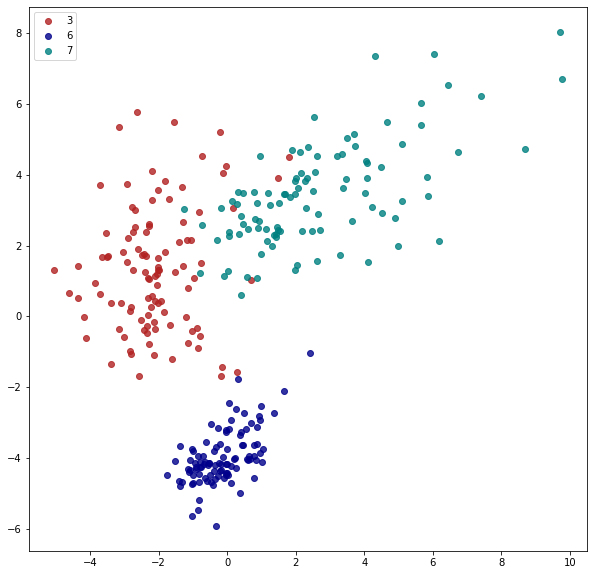

In [13]:
#2-d plot
colors=('firebrick','darkblue','teal')
fig = plt.figure(figsize=(10,10))
for i, number in enumerate([3,6,7]):
    plt.plot(np.array(s1P[temp['y']==number,0]), np.array(s1P[temp['y']==number,1]),
        'o', color=colors[i], alpha=0.8, label=i)
plt.legend(['3','6','7'],loc='upper left')

## Task 2. Classify the digits using leading principal components

### Q1. Train multi-class logistic regression over the first 1000 digits using first 5 leading principal components
Report in-sample and out-of-sample (over X3, the last 300 digits) accuracy. 

You will need to apply the same scaler and PCA transform trained above to X3

Here and further use regularization constant C=10000 in logistic regression to avoid regularization

# Train multi-class logistic regression over training test using first 5 PC

In [14]:
logreg = LogisticRegression(C=10000) 
Y=y1
X=s1P[:,0:5]
logreg.fit(X, Y)
M = logreg.predict(X)
#report accuracy
print('The in sample Accuracy Score is: {}'.format(1.0*sum(M==y1)/len(M)))


The in sample Accuracy Score is: 0.836


## PCA over scaled test set s3

In [15]:
s3P=pca.transform(s3)
eigenvalues_test = pca.explained_variance_ratio_
digit_pred_test=logreg.predict(s3P[:,0:5])

#report accuracy
print('The out of sample Accuracy Score is: {}'.format(1.0*sum(digit_pred_test==y3)/len(digit_pred_test)))

The out of sample Accuracy Score is: 0.7166666666666667


### Q2. Select the optimal number of principal components for the classification above in terms of the out-of-sample accuracy measured over the validation sample X2. Report the performance of the classification after this feature selection over the test sample X3 of the last 300 digits.

# Conduct PC decomposition over Validation scaled set s2

In [16]:
s2P=pca.transform(s2)
eigenvalues_valid = pca.explained_variance_ratio_

In [17]:
#report accuracy
digit_pred_valid=logreg.predict(s2P[:,0:5])
print('The out of sample Accuracy Score is: {}'.format(1.0*sum(digit_pred_valid==y2)/len(digit_pred_valid)))

The out of sample Accuracy Score is: 0.7947686116700201


In [18]:
s1P.shape

(1000, 64)

# Finding optimal accuracy score over all principal components of validation test

In [19]:
opt_pca=[]
logreg_optimal = LogisticRegression(C=10000) 
for i in range(1,s1P.shape[1]+1):
    logreg_optimal.fit(s1P[:,0:i], y1)
    y=1.0*sum(logreg_optimal.predict(s2P[:,0:i])==y2)/len(logreg_optimal.predict(s2P[:,0:i]))
    opt_pca.append(y)
print('The Optimal Accuracy Score is {0} with {1} principal components'.format(max(opt_pca),np.argmax(opt_pca)))


The Optimal Accuracy Score is 0.9436619718309859 with 24 principal components


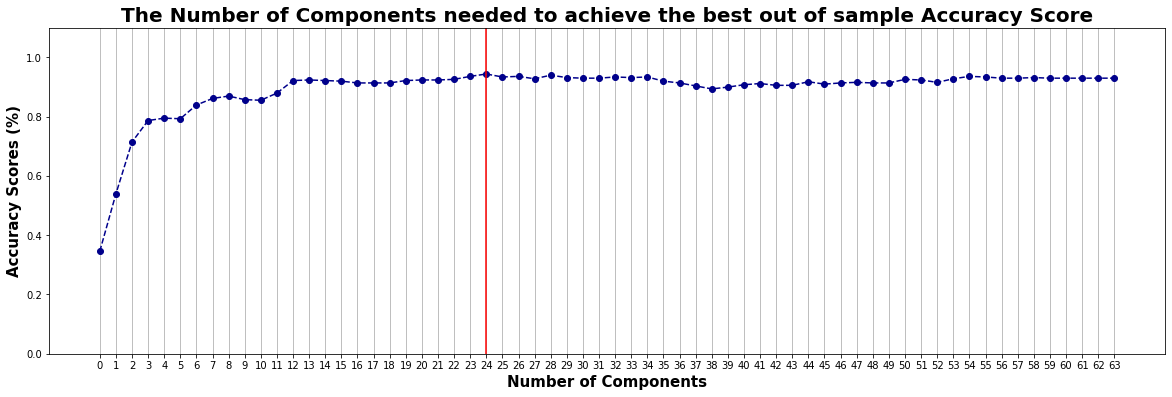

In [20]:
logreg_optimal = LogisticRegression(C=10000) 
logreg_optimal.fit(s1P[:,:], y1)
plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(0, 64, step=1)
y = opt_pca

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='darkblue')

plt.xlabel('Number of Components', weight='bold', size=15)
plt.xticks(np.arange(0, 64, step=1))
plt.ylabel('Accuracy Scores (%)', weight='bold', size=15)
plt.title('The Number of Components needed to achieve the best out of sample Accuracy Score', weight='bold', size=20)

plt.axvline(np.argmax(opt_pca), color='r')

ax.grid(axis='x')
plt.show()

# Train model on 24PCs and report accuracy score of test set

In [21]:
final_logreg = LogisticRegression(C=10000) 
final_logreg.fit(s1P[:,0:np.argmax(opt_pca)+1], y1)

#report accuracy score over test set
print('The out of sample Accuracy Score is: {}'.format(1.0*sum(final_logreg.predict(s3P[:,0:np.argmax(opt_pca)+1])==y3)/len(final_logreg.predict(s3P[:,0:np.argmax(opt_pca)+1]))))


The out of sample Accuracy Score is: 0.85


## Task3. Time Series Analysis
**Dataset Description**
- Portland Oregon riders monthly data: It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

**Tasks**:
- Detect a trend
- Decompose into trend + seasonality + residuals
- Analyze residual distribution
- Select the top 3-5 outliers based on absolute values of residuals 

In [22]:
# import dataset
df = pd.read_csv("portland-oregon-average-monthly-.csv")

In [23]:
# change column name to make it easier for your life
df.columns = ["month", "avgMonthlyRide"]

In [24]:
# remove artifact data
df = df.drop(df.index[df['avgMonthlyRide'] == ' n=114'])

In [25]:
# type transfer: int32 for `avgMonthlyRide`, datetime for `month`
df['avgMonthlyRide'] = df['avgMonthlyRide'].astype(np.int32)
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.head()

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [26]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
month             114 non-null datetime64[ns]
avgMonthlyRide    114 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.2 KB


In [27]:
# get the describe of the dataset
df.describe()

,avgMonthlyRide
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


### Q1. Visualize the time-series of monthly ridership

In [28]:
df.set_index('month',inplace=True)
df.avgMonthlyRide.interpolate(inplace=True)

In [29]:
df.tail()

,avgMonthlyRide
month,
1969-02-01,1425
1969-03-01,1419
1969-04-01,1432
1969-05-01,1394
1969-06-01,1327


<function matplotlib.pyplot.show(*args, **kw)>

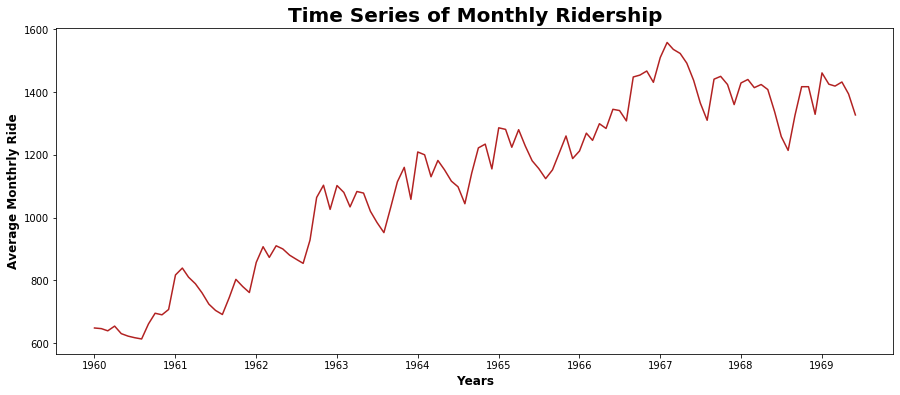

In [30]:
plt.figure(figsize = (15,6))
plt.plot(df.index,df.avgMonthlyRide, label = 'avgMonthlyRide', color = 'firebrick')

plt.title('Time Series of Monthly Ridership', weight='bold', fontsize=20)
plt.xlabel("Years", weight='bold', fontsize=12)
plt.ylabel("Average Monthrly Ride", weight='bold', fontsize=12)

plt.show

### Q2. Visualize the 12-month moving average to assess the trend

<function matplotlib.pyplot.show(*args, **kw)>

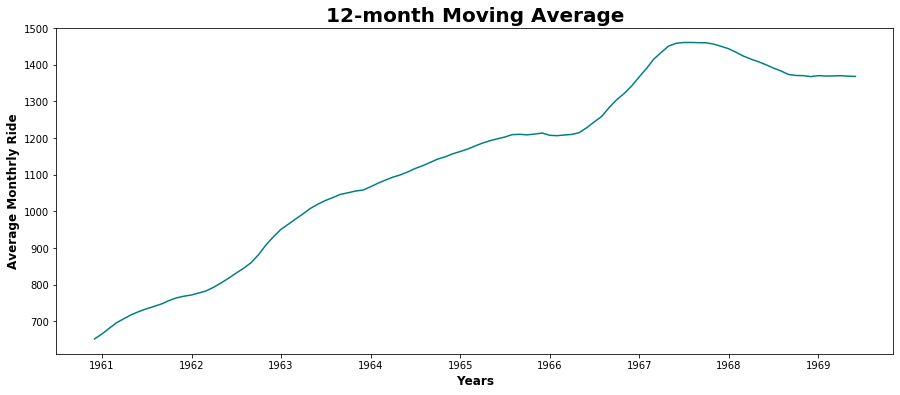

In [31]:
plt.figure(figsize = (15,6))
plt.plot(df.index,df.avgMonthlyRide.rolling(window = 12).mean(), label = 'avgMonthlyRide', color = 'teal')

plt.title("12-month Moving Average", weight='bold', fontsize=20)
plt.xlabel("Years", weight='bold', fontsize=12)
plt.ylabel("Average Monthrly Ride", weight='bold', fontsize=12)

plt.show

### Q3. Perform seasonal decomposition using 12 month period

<Figure size 1440x1080 with 0 Axes>

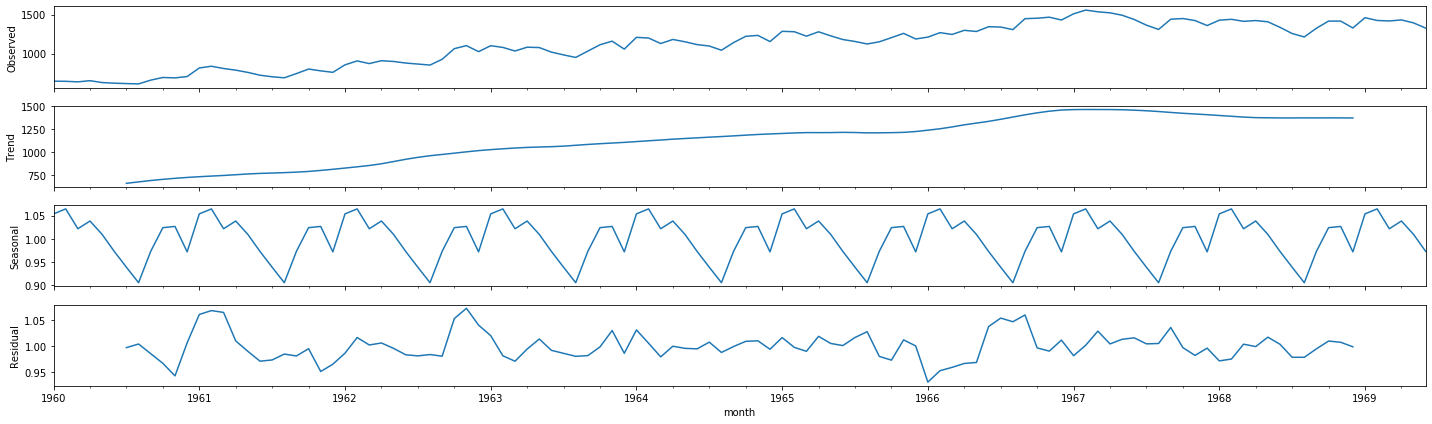

In [32]:
plt.figure(figsize=(20,15))

seasonal_decomp = sm.tsa.seasonal_decompose(df, model='mult', freq=12)
seasonal_decomp.plot()

plt.show()

### Q4. Visualize the distribution of residues and visually compare it with normal distribution with the same mean and standard deviation

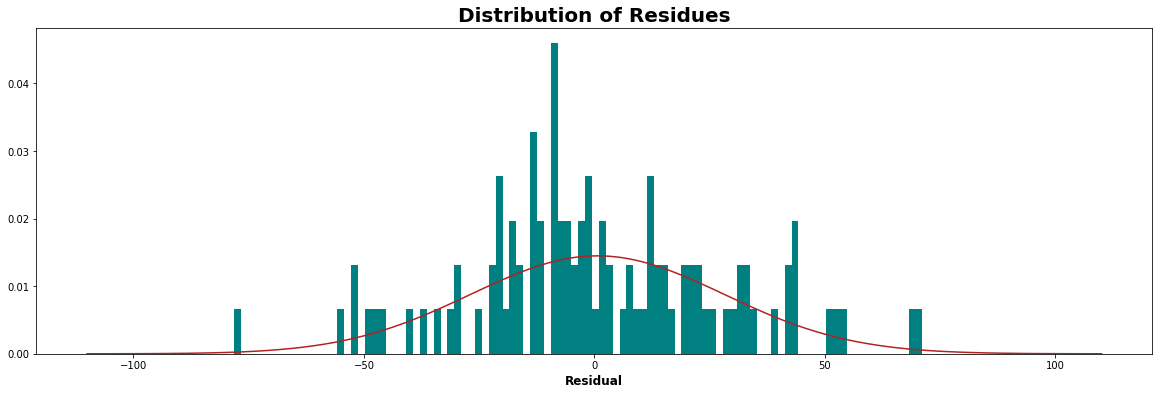

In [33]:
from numpy.random import seed
from numpy.random import randn
import scipy

seed(123)

addResult = sm.tsa.seasonal_decompose(df)
residual = np.array(addResult.resid)
residual = residual[np.logical_not(np.isnan(residual))]

plt.figure(figsize=(20,6))
plt.hist(residual,bins=100,density=True, color='teal')
sigma=residual.std()
x=np.linspace(-4*sigma,4*sigma,100)

plt.title("Distribution of Residues", weight='bold', fontsize=20)
plt.xlabel("Residual", weight='bold', fontsize=12)

plt.plot(x,scipy.stats.norm.pdf(x,loc=residual.mean(),scale=sigma), color='firebrick')
plt.show()

### Q5. Find the strongest lower/upper outliers (months with the smallest and largest residues)

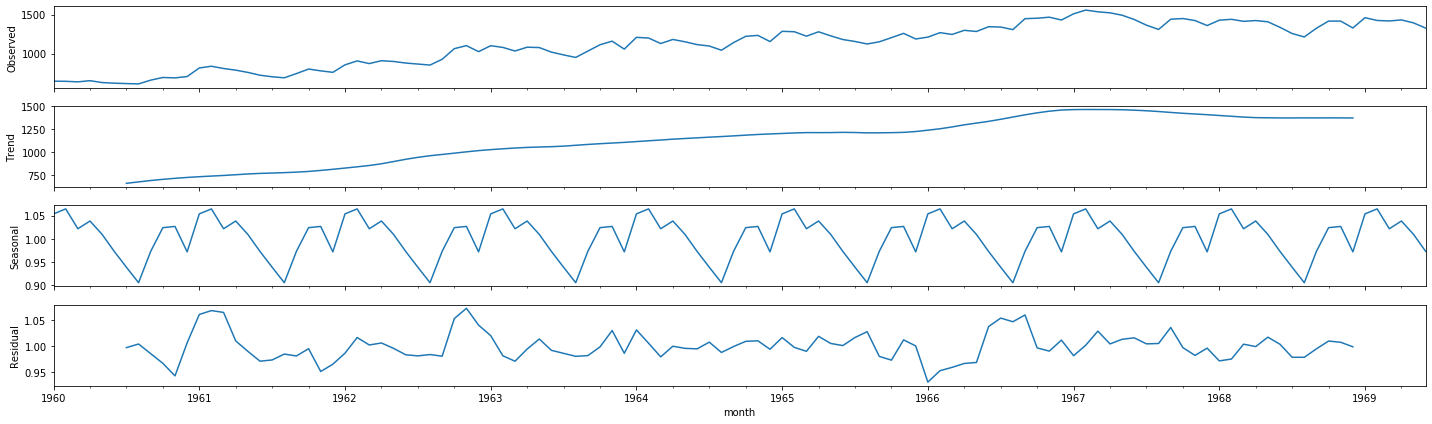

In [34]:
seasonal_decomp.plot()
plt.show()

In [35]:
seasonal_decomp.resid.head(20)

,avgMonthlyRide
month,
1960-01-01,NaN
1960-02-01,NaN
1960-03-01,NaN
1960-04-01,NaN
1960-05-01,NaN
1960-06-01,NaN
1960-07-01,0.997459
1960-08-01,1.004407
1960-09-01,0.985716


In [36]:
out=pd.DataFrame()
out['resid']=seasonal_decomp.resid.avgMonthlyRide
out['percentile_rank']=out.resid.rank(pct=True)-0.5
out.dropna(how='all', inplace=True)
out.isna().sum()

resid              0
percentile_rank    0
dtype: int64

In [37]:
out.head()

,resid,percentile_rank
month,,
1960-07-01,0.997459,-0.019608
1960-08-01,1.004407,0.117647
1960-09-01,0.985716,-0.196078
1960-10-01,0.967008,-0.421569
1960-11-01,0.942772,-0.480392


In [38]:
out_sorted=out.sort_values(by='percentile_rank', ascending=True)
out_sorted.head()

,resid,percentile_rank
month,,
1966-01-01,0.930669,-0.490196
1960-11-01,0.942772,-0.480392
1961-11-01,0.951218,-0.470588
1966-02-01,0.952772,-0.460784
1966-03-01,0.959269,-0.450980


In [39]:
print('The month with the smallest residual value is {0} for the year {1}'.format(str(out_sorted.index[0])[5:7],str(out_sorted.index[0])[0:4])) 
print('The month with the largest residual value is {0} for the year {1}'.format(str(out_sorted.index[-1])[5:7],str(out_sorted.index[-1])[0:4]))
                                                                                  

The month with the smallest residual value is 01 for the year 1966
The month with the largest residual value is 11 for the year 1962
